In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import re
import pandas as pd

Helper function

In [2]:
def keep_between_delimiters(text, start_delim, end_delim):
    # Create a regex pattern to capture text between start_delim and end_delim
    pattern = re.compile(re.escape(start_delim) + '(.*?)' + re.escape(end_delim))
    # Use re.findall() to extract the captured text
    matches = re.findall(pattern, text)
    # Join the matched text to form the final result
    result = ''.join(matches)
    return result

# import VIDA results

In [3]:
# Directory containing your data files
out_folder = '../results/mring/selected_sgra_images/'
# Directory containing your data files
in_folder = '../data/selected_sgra_images/'

# List all files in the directory
file_names_out = os.listdir(out_folder)
# Select txt files only
file_names_out = sorted([file for file in file_names_out if file.endswith('.txt')])

case_strings = []
for filename in file_names_out:
    if filename[:-12] not in case_strings:
        case_strings.append(filename[:-12])
        
# THIS IS JUST BECAUSE DATA IS NOT YET CPMPLETE
case_strings = case_strings[0:-14]
case_strings

['sgra_Ma+0.5_30_1_0230_1_160',
 'sgra_Ma+0.5_30_1_0230_1_40',
 'sgra_Ma+0.5_30_2_0230_1_160',
 'sgra_Ma+0.5_30_2_0230_1_40',
 'sgra_Ma+0.5_30_3_0230_1_160',
 'sgra_Ma+0.5_30_3_0230_1_40',
 'sgra_Ma+0.5_30_4_0230_1_160',
 'sgra_Ma+0.5_30_4_0230_1_40',
 'sgra_Ma+0.5_30_5_0230_1_160',
 'sgra_Ma+0.5_30_5_0230_1_40',
 'sgra_Ma+0.5_50_1_0230_1_10',
 'sgra_Ma+0.5_50_2_0230_1_10',
 'sgra_Ma+0.5_50_3_0230_1_10',
 'sgra_Ma+0.5_50_4_0230_1_10',
 'sgra_Ma+0.5_50_5_0230_1_10',
 'sgra_Ma+0.94_10_1_0230_1_10',
 'sgra_Ma+0.94_10_1_0230_1_160',
 'sgra_Ma+0.94_10_1_0230_1_40',
 'sgra_Ma+0.94_10_2_0230_1_10',
 'sgra_Ma+0.94_10_2_0230_1_160',
 'sgra_Ma+0.94_10_2_0230_1_40',
 'sgra_Ma+0.94_10_3_0230_1_10',
 'sgra_Ma+0.94_10_3_0230_1_160',
 'sgra_Ma+0.94_10_3_0230_1_40',
 'sgra_Ma+0.94_10_4_0230_1_10',
 'sgra_Ma+0.94_10_4_0230_1_160',
 'sgra_Ma+0.94_10_4_0230_1_40',
 'sgra_Ma+0.94_10_5_0230_1_10',
 'sgra_Ma+0.94_10_5_0230_1_160',
 'sgra_Ma+0.94_10_5_0230_1_40',
 'sgra_Ma+0.94_30_1_0230_1_10',
 'sgra_Ma+0.9

In [4]:
data = []

# Loop over each filename in the array
for casename in case_strings:
    
    # Build the required filenames
    file_in_n0 = casename + "_n000.h5"
    file_in_n1 = casename + "_n001.h5"
    file_out_n0 = casename + "_n000.h5.txt"
    file_out_n1 = casename + "_n001.h5.txt"
    
    # Get input data
    with h5py.File(os.path.join(in_folder, file_in_n0), 'r') as file:
        spin = file['fluid_header']['a'][()]
        inclination = file['header']['camera']['thetacam'][()]
        
    # Get output data
    with open(out_folder + file_out_n0, 'r') as file:
        # Skip the first two lines and read the third
        file.readline()
        file.readline()
        line = file.readline().strip()
        # Extract the two shifts
        x_n0 = keep_between_delimiters(line, 'x = ', ",")
        x_n0 = float(x_n0)
        y_n0 = keep_between_delimiters(line, 'y = ', ")")
        y_n0 = float(y_n0)
    with open(out_folder + file_out_n1, 'r') as file:
        # Skip the first two lines and read the third
        file.readline()
        file.readline()
        line = file.readline().strip()
        # Extract the two shifts
        x_n1 = keep_between_delimiters(line, 'x = ', ",")
        x_n1 = float(x_n1)
        y_n1 = keep_between_delimiters(line, 'y = ', ")")
        y_n1 = float(y_n1)
        
    # Calculate the shifts
    centroid_shift_x = x_n0 - x_n1
    centroid_shift_y = y_n0 - y_n1
    
    # Append datapoint
    data.append([spin, inclination, centroid_shift_x, centroid_shift_y])


Get the mean and stdv.

In [6]:
selected = [] 
spinselectval = 0.5
inclselectval = 30.0
for case in data:
    if abs(case[0] - spinselectval) < 0.01 and abs(case[1] - inclselectval) < 0.01:
        selected.append(case)

centroid_shift_x_mean = [np.mean(np.array(selected)[:, -2]), np.std(np.array(selected)[:, -2])]
centroid_shift_y_mean = [np.mean(np.array(selected)[:, -1]), np.std(np.array(selected)[:, -1])]
centroid_shift_mean = [
    np.mean(np.sqrt(np.array(selected)[:, -2]**2 + np.array(selected)[:, -1]**2)), 
    np.std(np.sqrt(np.array(selected)[:, -2]**2 + np.array(selected)[:, -1]**2))
]

print('spin:', spinselectval)
print('inclination:', inclselectval)
print('[mean, stdv] for centroid shift from n0 to n1 in x direction:', centroid_shift_x_mean)
print('[mean, stdv] for centroid shift from n0 to n1 in y direction:', centroid_shift_y_mean)
print('[mean, stdv] for total centroid shift from n0 to n1:', centroid_shift_mean)
print('for N =', len(selected), 'GRMHD cases')

spin: 0.5
inclination: 30.0
[mean, stdv] for centroid shift from n0 to n1 in x direction: [1.5789636213769307, 0.3242039198281543]
[mean, stdv] for centroid shift from n0 to n1 in y direction: [-4.288499917868721, 0.3487166297794319]
[mean, stdv] for total centroid shift from n0 to n1: [4.589243637518381, 0.22340986595384113]
for N = 10 GRMHD cases


In [7]:
selected = [] 
spinselectval = 0.5
inclselectval = 50.0
for case in data:
    if abs(case[0] - spinselectval) < 0.01 and abs(case[1] - inclselectval) < 0.01:
        selected.append(case)

centroid_shift_x_mean = [np.mean(np.array(selected)[:, -2]), np.std(np.array(selected)[:, -2])]
centroid_shift_y_mean = [np.mean(np.array(selected)[:, -1]), np.std(np.array(selected)[:, -1])]
centroid_shift_mean = [
    np.mean(np.sqrt(np.array(selected)[:, -2]**2 + np.array(selected)[:, -1]**2)), 
    np.std(np.sqrt(np.array(selected)[:, -2]**2 + np.array(selected)[:, -1]**2))
]

print('spin:', spinselectval)
print('inclination:', inclselectval)
print('[mean, stdv] for centroid shift from n0 to n1 in x direction:', centroid_shift_x_mean)
print('[mean, stdv] for centroid shift from n0 to n1 in y direction:', centroid_shift_y_mean)
print('[mean, stdv] for total centroid shift from n0 to n1:', centroid_shift_mean)
print('for N =', len(selected), 'GRMHD cases')

spin: 0.5
inclination: 50.0
[mean, stdv] for centroid shift from n0 to n1 in x direction: [1.6210333989003078, 0.3615506084283929]
[mean, stdv] for centroid shift from n0 to n1 in y direction: [-7.772594772902627, 0.5044796888470179]
[mean, stdv] for total centroid shift from n0 to n1: [7.953185320947304, 0.41598153046257375]
for N = 5 GRMHD cases


In [8]:
selected = [] 
spinselectval = 0.94
inclselectval = 10.0
for case in data:
    if abs(case[0] - spinselectval) < 0.01 and abs(case[1] - inclselectval) < 0.01:
        selected.append(case)

centroid_shift_x_mean = [np.mean(np.array(selected)[:, -2]), np.std(np.array(selected)[:, -2])]
centroid_shift_y_mean = [np.mean(np.array(selected)[:, -1]), np.std(np.array(selected)[:, -1])]
centroid_shift_mean = [
    np.mean(np.sqrt(np.array(selected)[:, -2]**2 + np.array(selected)[:, -1]**2)), 
    np.std(np.sqrt(np.array(selected)[:, -2]**2 + np.array(selected)[:, -1]**2))
]

print('spin:', spinselectval)
print('inclination:', inclselectval)
print('[mean, stdv] for centroid shift from n0 to n1 in x direction:', centroid_shift_x_mean)
print('[mean, stdv] for centroid shift from n0 to n1 in y direction:', centroid_shift_y_mean)
print('[mean, stdv] for total centroid shift from n0 to n1:', centroid_shift_mean)
print('for N =', len(selected), 'GRMHD cases')

spin: 0.94
inclination: 10.0
[mean, stdv] for centroid shift from n0 to n1 in x direction: [0.2427992109646059, 0.6982036299644342]
[mean, stdv] for centroid shift from n0 to n1 in y direction: [-1.1392387456792685, 0.3010006064185191]
[mean, stdv] for total centroid shift from n0 to n1: [1.333231938299766, 0.39673498605389723]
for N = 15 GRMHD cases


In [9]:
selected = [] 
spinselectval = 0.94
inclselectval = 30.0
for case in data:
    if abs(case[0] - spinselectval) < 0.01 and abs(case[1] - inclselectval) < 0.01:
        selected.append(case)

centroid_shift_x_mean = [np.mean(np.array(selected)[:, -2]), np.std(np.array(selected)[:, -2])]
centroid_shift_y_mean = [np.mean(np.array(selected)[:, -1]), np.std(np.array(selected)[:, -1])]
centroid_shift_mean = [
    np.mean(np.sqrt(np.array(selected)[:, -2]**2 + np.array(selected)[:, -1]**2)), 
    np.std(np.sqrt(np.array(selected)[:, -2]**2 + np.array(selected)[:, -1]**2))
]

print('spin:', spinselectval)
print('inclination:', inclselectval)
print('[mean, stdv] for centroid shift from n0 to n1 in x direction:', centroid_shift_x_mean)
print('[mean, stdv] for centroid shift from n0 to n1 in y direction:', centroid_shift_y_mean)
print('[mean, stdv] for total centroid shift from n0 to n1:', centroid_shift_mean)
print('for N =', len(selected), 'GRMHD cases')

spin: 0.94
inclination: 30.0
[mean, stdv] for centroid shift from n0 to n1 in x direction: [2.33900383852156, 0.5785535696568048]
[mean, stdv] for centroid shift from n0 to n1 in y direction: [-4.290590734917026, 0.3001763162552838]
[mean, stdv] for total centroid shift from n0 to n1: [4.914025179860046, 0.39660357623084264]
for N = 15 GRMHD cases


In [11]:
spins = np.unique(np.array(data)[:,0]).tolist()
inclinations = np.unique(np.array(data)[:,1]).tolist()

In [18]:
resData = []

for spin in spins:
    for incl in inclinations:
        selected = [] 
        for case in data:
            if abs(case[0] - spin) < 0.01 and abs(case[1] - incl) < 0.01:
                selected.append(case)
                
        if len(selected)>0:
            centroid_shift_mean = np.mean(np.sqrt(np.array(selected)[:, -2]**2 + np.array(selected)[:, -1]**2)) 
            centroid_shift_stdv = np.std(np.sqrt(np.array(selected)[:, -2]**2 + np.array(selected)[:, -1]**2))
            centroid_shift_x_mean = np.mean(np.array(selected)[:, -2]) 
            centroid_shift_x_stdv = np.std(np.array(selected)[:, -2])
            centroid_shift_y_mean = np.mean(np.array(selected)[:, -1]) 
            centroid_shift_y_stdv = np.std(np.array(selected)[:, -1])
            resData.append([
                len(selected),
                spin,incl,
                centroid_shift_mean, centroid_shift_stdv,
                centroid_shift_x_mean, centroid_shift_x_stdv,
                centroid_shift_y_mean, centroid_shift_y_stdv
            ])

In [19]:
pd.DataFrame(
    np.array(resData), 
    columns=['# cases','spin', 'incl', '|shift| mean', '|shift| stdv', 'x-shift mean', 'x-shift stdv', 'y-shift mean', 'y-shift stdv']
)

,# cases,spin,incl,|shift| mean,|shift| stdv,x-shift mean,x-shift stdv,y-shift mean,y-shift stdv
0,10.0,0.5000,30.0,4.589244,0.223410,1.578964,0.324204,-4.288500,0.348717
1,5.0,0.5000,50.0,7.953185,0.415982,1.621033,0.361551,-7.772595,0.504480
2,15.0,0.9375,10.0,1.333232,0.396735,0.242799,0.698204,-1.139239,0.301001
3,15.0,0.9375,30.0,4.914025,0.396604,2.339004,0.578554,-4.290591,0.300176
4,15.0,0.9375,50.0,9.181149,0.538051,2.931186,0.711614,-8.663211,0.658430


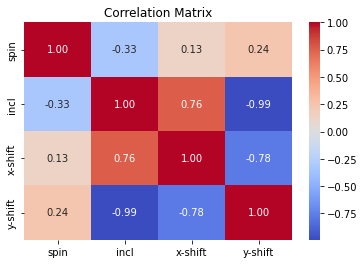

In [20]:
df = pd.DataFrame(np.array(resData)[:,[1,2,5,7]], columns=['spin', 'incl', 'x-shift', 'y-shift'])
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

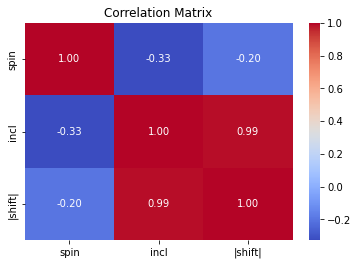

In [21]:
df = pd.DataFrame(np.array(resData)[:,[1,2,3]], columns=['spin', 'incl', '|shift|'])
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()